# Setting up our data

We load the given database into Python as a pandas DataFrame:

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import math

import sqlite3
with sqlite3.connect("hw1-population.db") as db:
    data = pd.read_sql_query("SELECT * FROM population", db)

In [3]:
df = pd.DataFrame(data)

In [4]:
df

,name,age,weight,eyecolor
0,Edna Phelps,88.895690,67.122450,brown
1,Cara Yasso,9.274597,29.251244,brown
2,Gail Rave,18.345613,55.347903,brown
3,Richard Adams,16.367545,70.352184,brown
4,Krista Slater,49.971604,70.563859,brown
...,...,...,...,...
152356,John Fowler,23.930833,71.532569,blue
152357,Diana Shuffler,21.884819,67.936753,brown
152358,Kevin Cuningham,87.705907,60.074646,brown
152359,James Libengood,21.727666,81.774985,brown


Our data has four columns : name, age, weight, eyecolor (the "fifth" column on the very left contains the unique keys of every row/person. Our data has 152361 rows/persons (the count starts at 0 in the table).

# Distribution of Age

In [5]:
ages = df.age #treating age as an object property

ages_mean = ages.mean()
print(f'Mean age in years: {ages_mean}')

ages_stdev = ages.std()
print(f'Standard deviation in years: {ages_stdev}')

ages_min = ages.min()
print(f'Minimum age in years: {ages_min}; in hours that is: {ages_min*12*30*24}')

ages_max = ages.max()
print(f'Maximum age in years: {ages_max}')


Mean age in years: 39.510527927396524
Standard deviation in years: 24.152760068601445
Minimum age in years: 0.0007476719217636152; in hours that is: 6.459885404037635
Maximum age in years: 99.99154733076972


To determine the number of bins for a useful histogram, we use a simplified version of Sturge's rule stating that
K = 1 + 3.322 log10(N)

With K the optimal number of bins and N the size of our dataset and
N the size of our dataset (rows)


In [14]:
1+3.322*math.log10(len(df.index))

18.217506811533234

array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

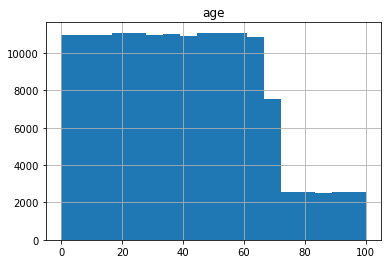

In [17]:
df.hist(column='age', bins=18)

This dataset seems to contain mainly people aged 0-65 and five times less seniors (70-100).

## Distribution of Weight

In [7]:
weights = df.weight #treating weight as an object property

weights_mean = weights.mean()
print(f'Mean weight in kg: {weights_mean}')

weights_stdev = weights.std()
print(f'Standard deviation in kg: {weights_stdev}')

weights_min = weights.min()
print(f'Minimum weight in years: {weights_min}')

weights_max = weights.max()
print(f'Maximum weight in kg: {weights_max}')

Mean weight in kg: 60.88413415993031
Standard deviation in kg: 18.411824265661494
Minimum weight in years: 3.3820836824389326
Maximum weight in kg: 100.43579300336947


array([[<AxesSubplot:title={'center':'weight'}>]], dtype=object)

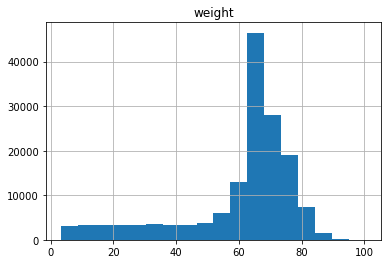

In [20]:
df.hist(column='weight', bins=18)

Given that the dataset is composed of a large majority of biologically adult humans, this distribution makes sense, as 70 kg is a "normal" adult weight and the long tail to the left is explained by the fact that babies, children and adolescents are also included in the dataset.

## Weight vs Age

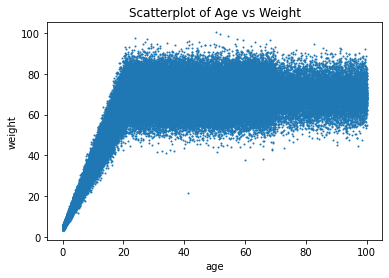

In [21]:
weight_vs_age_scatterplot = df.plot(
    kind='scatter', #specify type of plot
    title= 'Scatterplot of Age vs Weight', #Specify plot title
    x='age', #Specify column for x axis
    y='weight', #Specify column for x axis
    s=1
    )

The scatterplot reflects the fact that between the ages of 0 and 20 (childhood + adolescence), there is a relationship between weight and age (the older, the heavier). Once an adult, there is no such relationship anymore: people stop growing. 
There is one clear outlier in this dataset: one person aged about 42y weighs about 20kg. We shall find the name of this patient with the following sql query:

In [22]:
weight_outlier_patient = pd.read_sql_query("SELECT name, weight, age FROM population WHERE age>30 AND weight < 30", db)

In [23]:
print(weight_outlier_patient)

              name  weight   age
0  Anthony Freeman    21.7  41.3


The outlier is Anthony Freeman, aged 41.3 years and weighing 21.7kg.